2.0
2.0
0.0625
1.0
0.03333333333333333
0.9999999999999999


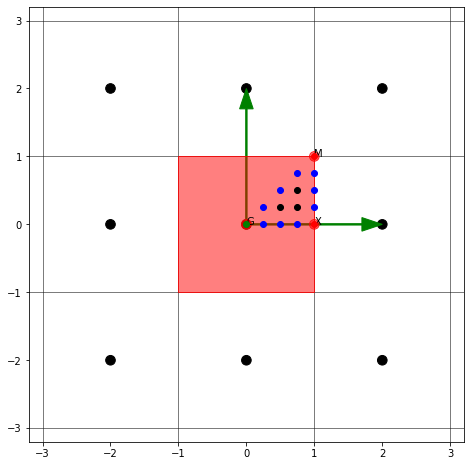

In [35]:
import numpy as np
from reciprocal.lattice import LatticeVectors, Lattice
from reciprocal.canvas import Canvas
from reciprocal.primitive import Primitive
from reciprocal.kvector import KVectorGroup
from reciprocal.kspace import KSpace
import matplotlib.pyplot as plt
#from matplotlib.patches import Circle
#from matplotlib.backends.backend_pdf import PdfPages

angle = 90.0
lat = Lattice(np.pi, np.pi, angle)
rec_lat = lat.make_reciprocal()
print(rec_lat.vectors.length1)
print(rec_lat.vectors.length2)
fig, ax_1 = plt.subplots(1, 1, figsize= (12, 8))
can = Canvas(ax=ax_1)
can.plot_vectors(rec_lat)
can.plot_lattice(rec_lat)
#can.plot_primitive(rec_lat)
can.plot_tesselation(rec_lat)
can.plot_symmetry_points(rec_lat)
can.plot_bzone(rec_lat)
#can.plot_
#can.plot_sampling(rec_lat.bzone.sampling)
can.plot_sampling(rec_lat.bzone.irreducible.sampling)
#print(rec_lat.bzone.sampling)
real_area = rec_lat.bzone.area()
#print(rec_lat.bzone.sampling.shape)
density = rec_lat.bzone.area()/rec_lat.bzone.sampling.shape[0]
print(density)
area_1 = 0.0
for sample_point in range(rec_lat.bzone.sampling.shape[0]):
    area_1 += density
print(area_1/real_area)
#print(rec_lat.bzone.irreducible.sampling)

def simplify_sampling(sampling_dict):
    all_points = []
    for value in sampling_dict.values():
        for point in range(value.shape[0]):
            all_points.append(value[point,:])
    return np.array(all_points)
        
all_points = simplify_sampling(rec_lat.bzone.irreducible.sampling)

density2 = rec_lat.bzone.irreducible.area()/all_points.shape[0]
print(density2)
area_2 = 0.0
for sample_point in range(all_points.shape[0]):
    area_2 += density2*8.
print(area_2/real_area)


1.9999999999997684
8.881784197001252e-16


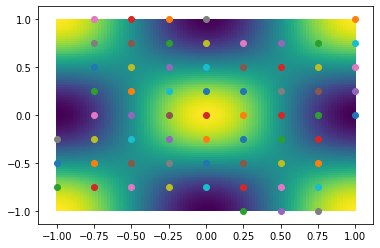

In [52]:
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)
def f(x,y):
    return 2.*np.cos(x*np.pi)*np.cos(y*np.pi)
plt.pcolormesh(x,y,f(X,Y))


integral_0 = 0.0
for sample_point in range(X.flatten().shape[0]):
    point = np.array([ X.flatten()[sample_point], Y.flatten()[sample_point]])
    integral_0 += f(point[0],point[1])    
print(integral_0)


integral_1 = 0.0
for sample_point in range(rec_lat.bzone.sampling.shape[0]):
    point = rec_lat.bzone.sampling[sample_point,:]    
    integral_1 += f(point[0],point[1])
    plt.scatter(point[0],point[1])
print(integral_1)


In [ ]:

"""
kspace = KSpace(rec_lat)
wvl = 1450.0e-9
k0 = 2*np.pi/wvl
n = 1.464406158
print(n, k0)
kspace.set_fermi_radius(k0*n)
can.plot_fermi_circle(kspace)
"""


#woods = kspace.calc_woods_anomalies(1)
#print(woods)
#plt.scatter(woods[0][0], woods[0][1], zorder= 10)
"""
phi = np.radians(0.0)
theta= np.radians(10.0)
kxy = k0*np.sin(theta)*n*np.array([ np.cos(phi), np.sin(phi)])
#fermi = Circle(xy=[0.0, 0.0], radius=k0*n)
fermi = Circle(xy=[0.0, 0.0], radius=k0*n, facecolor=[0.0, 0.0, 0.0, 0.0], edgecolor=[0.0, 0.0, 0.0, 1.0])
ax_1.add_artist(fermi)

vec1 = rec_rlat.vectors.vec1
vec2 = rec_rlat.vectors.vec1
print(kxy)
plt.scatter(kxy[0], kxy[1], zorder= 10)
plt.scatter(woods[0][0], woods[0][1], color='orange', zorder= 11)
plt.arrow(kxy[0], kxy[1], -vec1[0], vec1[1])
lims = 1e7
plt.xlim([-lims, lims])
plt.ylim([-lims, lims])
plt.sca(ax_2)
plt.xlim(0, 60.)
plt.ylim()
"""